---
#### Written by: 

    Habiba Mowafy

---

This notebook is part of the Cellula Internship. The goal of this task is to analyze a dataset related to hotel bookings, perform data cleaning, handle outliers, prepare the data for further analysis or modeling and apply suitable models.

In [155]:
# Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay

In [156]:
# Read the data
data = pd.read_csv("first inten project.csv")

In [157]:
# Display the first 10 rows of the data
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [158]:
# Display the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [159]:
# Display data description
data.describe() 

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [160]:
# Rename some columns
data.rename(columns={'repeated': 'regular customer',
                    'P-C': 'Previously Canceled reservations',
                    'P-not-C': 'Previously Not Canceled reservations',
                    'average price ': 'average price'},
            inplace=True, errors='raise')

In [161]:
# Check for missing values
data.isnull().sum()

Booking_ID                              0
number of adults                        0
number of children                      0
number of weekend nights                0
number of week nights                   0
type of meal                            0
car parking space                       0
room type                               0
lead time                               0
market segment type                     0
regular customer                        0
Previously Canceled reservations        0
Previously Not Canceled reservations    0
average price                           0
special requests                        0
date of reservation                     0
booking status                          0
dtype: int64

In [162]:
# Check how many unique values in each feature
data.nunique()

Booking_ID                              36285
number of adults                            5
number of children                          6
number of weekend nights                    8
number of week nights                      18
type of meal                                4
car parking space                           2
room type                                   7
lead time                                 352
market segment type                         5
regular customer                            2
Previously Canceled reservations            9
Previously Not Canceled reservations       59
average price                            3930
special requests                            6
date of reservation                       553
booking status                              2
dtype: int64

In [163]:
# Define a function to check if the date is in the correct format
import re

def is_valid_date_format(date):
    if pd.isna(date):
        return False
    # Pattern for MM/D/YYYY or M/D/YYYY
    pattern = r'^\d{1,2}/\d{1,2}/\d{4}$'
    return bool(re.match(pattern, str(date)))

In [164]:
# Extract invalid dates
invalid_dates = data[~data['date of reservation'].apply(is_valid_date_format)]

print(f"Number of invalid dates: {len(invalid_dates)}")
print("\nExamples of invalid dates:")
print(invalid_dates['date of reservation'].head(20))

Number of invalid dates: 37

Examples of invalid dates:
2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
Name: date of reservation, dtype: object


In [165]:
# Drop invalid dates
data = data[data['date of reservation'].apply(is_valid_date_format)]

# Verify the cleaning
print(f"\nNew dataset size: {len(data)}")


New dataset size: 36248


In [166]:
# Convert the date of reservation to datetime
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

In [167]:
# Recheck if there are missing values appeared after cleaning
data.isnull().sum()

Booking_ID                              0
number of adults                        0
number of children                      0
number of weekend nights                0
number of week nights                   0
type of meal                            0
car parking space                       0
room type                               0
lead time                               0
market segment type                     0
regular customer                        0
Previously Canceled reservations        0
Previously Not Canceled reservations    0
average price                           0
special requests                        0
date of reservation                     0
booking status                          0
dtype: int64

In [168]:
data['reservation_year'] = data['date of reservation'].dt.year.astype(int)
data['reservation_month'] = data['date of reservation'].dt.month.astype(int)
data['reservation_day'] = data['date of reservation'].dt.day.astype(int)
data.drop(columns=['date of reservation'], inplace=True) 

In [169]:
# Discover the unique values of the columns
checked_columns = ['type of meal', 'room type', 'market segment type']
for column in checked_columns:
    print(column)
    print(data[column].unique())
    print("----------------")

type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------
room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------------
market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
----------------


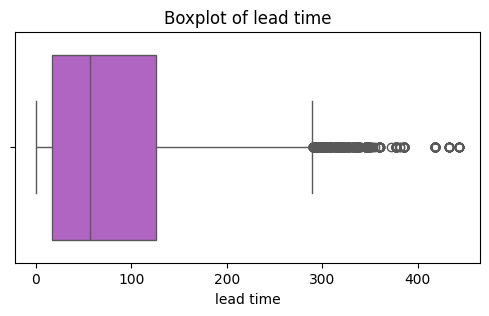

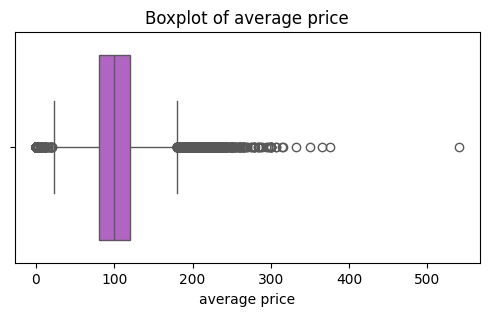

In [170]:
# Check the distribution of some columns
numeric_cols = ['lead time', 'average price']
for col in numeric_cols:
    plt.figure(figsize=(6, 3), )
    sns.boxplot(x=data[col], color='mediumorchid')
    plt.title(f'Boxplot of {col}')
    plt.show()


#### Handling Lead Time Outliers

In [171]:
# Define a function to identify outliers
q1 = data['lead time'].quantile(0.25)
q3 = data['lead time'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

def is_outlier(value):
    return value < lower_bound or value > upper_bound

In [172]:
# Calculate the average value excluding outliers
non_outliers = data[~data['lead time'].apply(is_outlier)]
average_value = non_outliers['lead time'].mean()

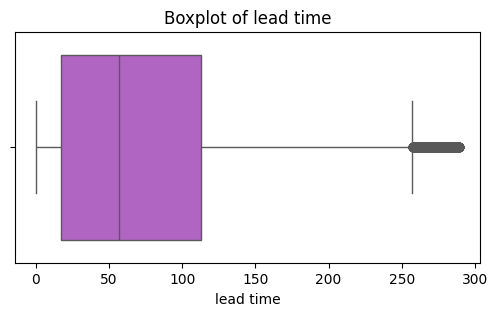

In [173]:
# Replace outliers with the average value
data['lead time'] = data['lead time'].apply(lambda x: average_value if is_outlier(x) else x)

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['lead time'], color='mediumorchid')
plt.title(f'Boxplot of {'lead time'}')
plt.show()

#### Handling Average Price Outliers

In [174]:
# Check counts of suspicious prices
print("Count of prices less than 25:", (data['average price'] < 25).sum())
print("Count of complementry reservations:", ((data['market segment type'] == 'Complementary') & (data['average price'] < 25)).sum())

Count of prices less than 25: 627
Count of complementry reservations: 374


In [175]:
def find_similar_bookings(row, segment_data, exclude_index):
    """
    Find similar bookings based on booking conditions
    Returns the mean price of similar bookings
    """
    # Define the features that make bookings similar
    similar_conditions = (
        (segment_data['number of adults'] == row['number of adults']) &
        (segment_data['number of children'] == row['number of children']) &
        (segment_data['number of weekend nights'] == row['number of weekend nights']) &
        (segment_data['number of week nights'] == row['number of week nights']) &
        (segment_data['room type'] == row['room type']) &
        (segment_data['type of meal'] == row['type of meal']) &
        (segment_data.index != exclude_index)  # Exclude the current booking
    )
    
    similar_bookings = segment_data[similar_conditions]
    
    # If we find similar bookings with non-zero prices, use their mean
    valid_prices = similar_bookings[similar_bookings['average price'] > 0]['average price']
    if len(valid_prices) > 0:
        return valid_prices.mean()
    
    # If no exact matches, relax conditions
    relaxed_conditions = (
        (segment_data['room type'] == row['room type']) &
        ((segment_data['number of adults'] + segment_data['number of children']) == (row['number of adults'] + row['number of children'])) &
        ((segment_data['number of week nights'] + segment_data['number of weekend nights']) == (row['number of week nights'] + row['number of weekend nights'])) &
        (segment_data.index != exclude_index)
    )
    
    relaxed_similar = segment_data[relaxed_conditions]
    valid_relaxed_prices = relaxed_similar[relaxed_similar['average price'] > 0]['average price']
    
    if len(valid_relaxed_prices) > 0:
        return valid_relaxed_prices.mean()
    
    # If still no matches, use the segment mean
    segment_mean = segment_data[segment_data['average price'] > 0]['average price'].mean()
    return segment_mean

In [176]:
# Process each market segment separately
cleaned_data = data.copy()
segments = ['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary']

for segment in segments:
    segment_data = data[data['market segment type'] == segment].copy()
    
    # Skip Complementary segment for zero prices as they might be valid
    if segment != 'Complementary':
        # Calculate segment-specific statistics
        q1 = segment_data['average price'].quantile(0.25)
        q3 = segment_data['average price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = max(10, q1 - 1.5 * iqr)
        upper_bound = q3 + 1.5 * iqr
        
        # Find outliers
        outlier_indices = segment_data[
            (segment_data['average price'] < lower_bound) |
            (segment_data['average price'] > upper_bound)
        ].index
        
        # Replace outliers with prices from similar bookings
        for idx in outlier_indices:
            similar_price = find_similar_bookings(
                data.loc[idx],
                segment_data,
                idx
            )
            cleaned_data.loc[idx, 'average price'] = similar_price


Statistics for Online:
Count: 23201
Mean price: 112.42
Min price: 35.20
Max price: 300.00


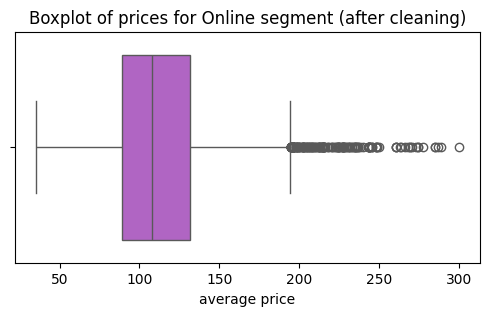


Statistics for Offline:
Count: 10521
Mean price: 90.69
Min price: 26.35
Max price: 184.50


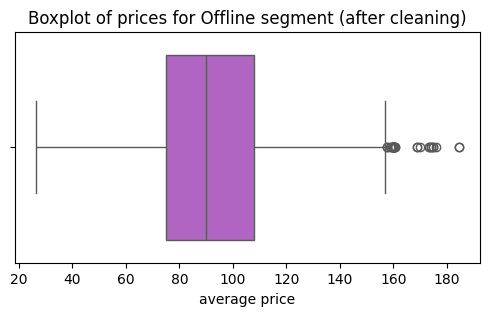


Statistics for Corporate:
Count: 2011
Mean price: 81.11
Min price: 31.00
Max price: 170.63


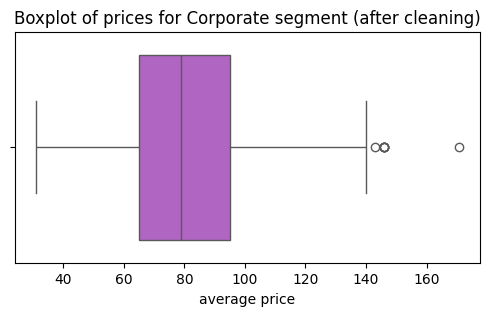


Statistics for Aviation:
Count: 125
Mean price: 100.70
Min price: 79.00
Max price: 110.00


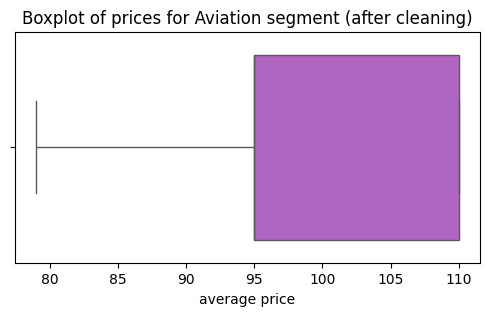


Statistics for Complementary:
Count: 390
Mean price: 3.14
Min price: 0.00
Max price: 170.00


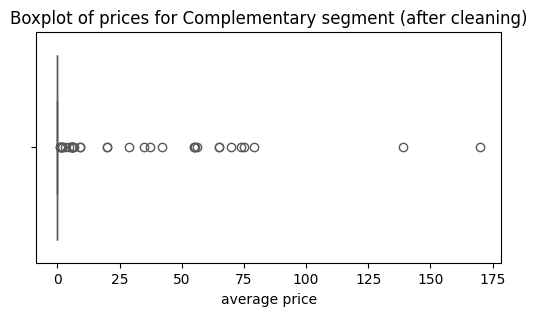

In [177]:
# Verify results
for segment in segments:
    segment_data = cleaned_data[cleaned_data['market segment type'] == segment]
    print(f"\nStatistics for {segment}:")
    print(f"Count: {len(segment_data)}")
    print(f"Mean price: {segment_data['average price'].mean():.2f}")
    print(f"Min price: {segment_data['average price'].min():.2f}")
    print(f"Max price: {segment_data['average price'].max():.2f}")
    
    # Create boxplot for each segment
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=segment_data, x='average price', color='mediumorchid')
    plt.title(f'Boxplot of prices for {segment} segment (after cleaning)')
    plt.show()

### Feature Engineering & Selection

In [178]:
cleaned_data.to_csv("first inten project_cleaned.csv", index=False)

In [179]:
cleaned_data.drop(columns=['Booking_ID'], inplace=True)

In [180]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cleaned_data['room type'] = le.fit_transform(cleaned_data['room type'])
cleaned_data['type of meal'] = le.fit_transform(cleaned_data['type of meal'])
cleaned_data['market segment type'] = le.fit_transform(cleaned_data['market segment type'])
cleaned_data['booking status'] = le.fit_transform(cleaned_data['booking status'])


In [181]:
cleaned_data['total nights'] = cleaned_data['number of weekend nights'] + cleaned_data['number of week nights']

In [182]:
cleaned_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,regular customer,Previously Canceled reservations,Previously Not Canceled reservations,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,total nights
0,1,1,2,5,0,0,0,224.0,3,0,0,0,88.00,0,1,2015,10,2,7
1,1,0,1,3,3,0,0,5.0,4,0,0,0,106.68,1,1,2018,11,6,4
2,2,1,1,3,0,0,0,1.0,4,0,0,0,50.00,0,0,2018,2,28,4
3,1,0,0,2,0,0,0,211.0,4,0,0,0,100.00,1,0,2017,5,20,2
4,1,0,1,2,3,0,0,48.0,4,0,0,0,77.00,0,0,2018,4,11,3


In [183]:
correlation_matrix = cleaned_data.corr()
correlation_with_price = correlation_matrix['booking status'].abs().sort_values(ascending=False)
print(correlation_with_price)

booking status                          1.000000
lead time                               0.395697
special requests                        0.253361
reservation_year                        0.179431
average price                           0.141504
market segment type                     0.135750
regular customer                        0.107479
total nights                            0.103304
number of week nights                   0.092732
number of adults                        0.086525
car parking space                       0.086047
number of weekend nights                0.061630
Previously Not Canceled reservations    0.060041
Previously Canceled reservations        0.033868
number of children                      0.032962
type of meal                            0.026582
room type                               0.023203
reservation_month                       0.012007
reservation_day                         0.011195
Name: booking status, dtype: float64


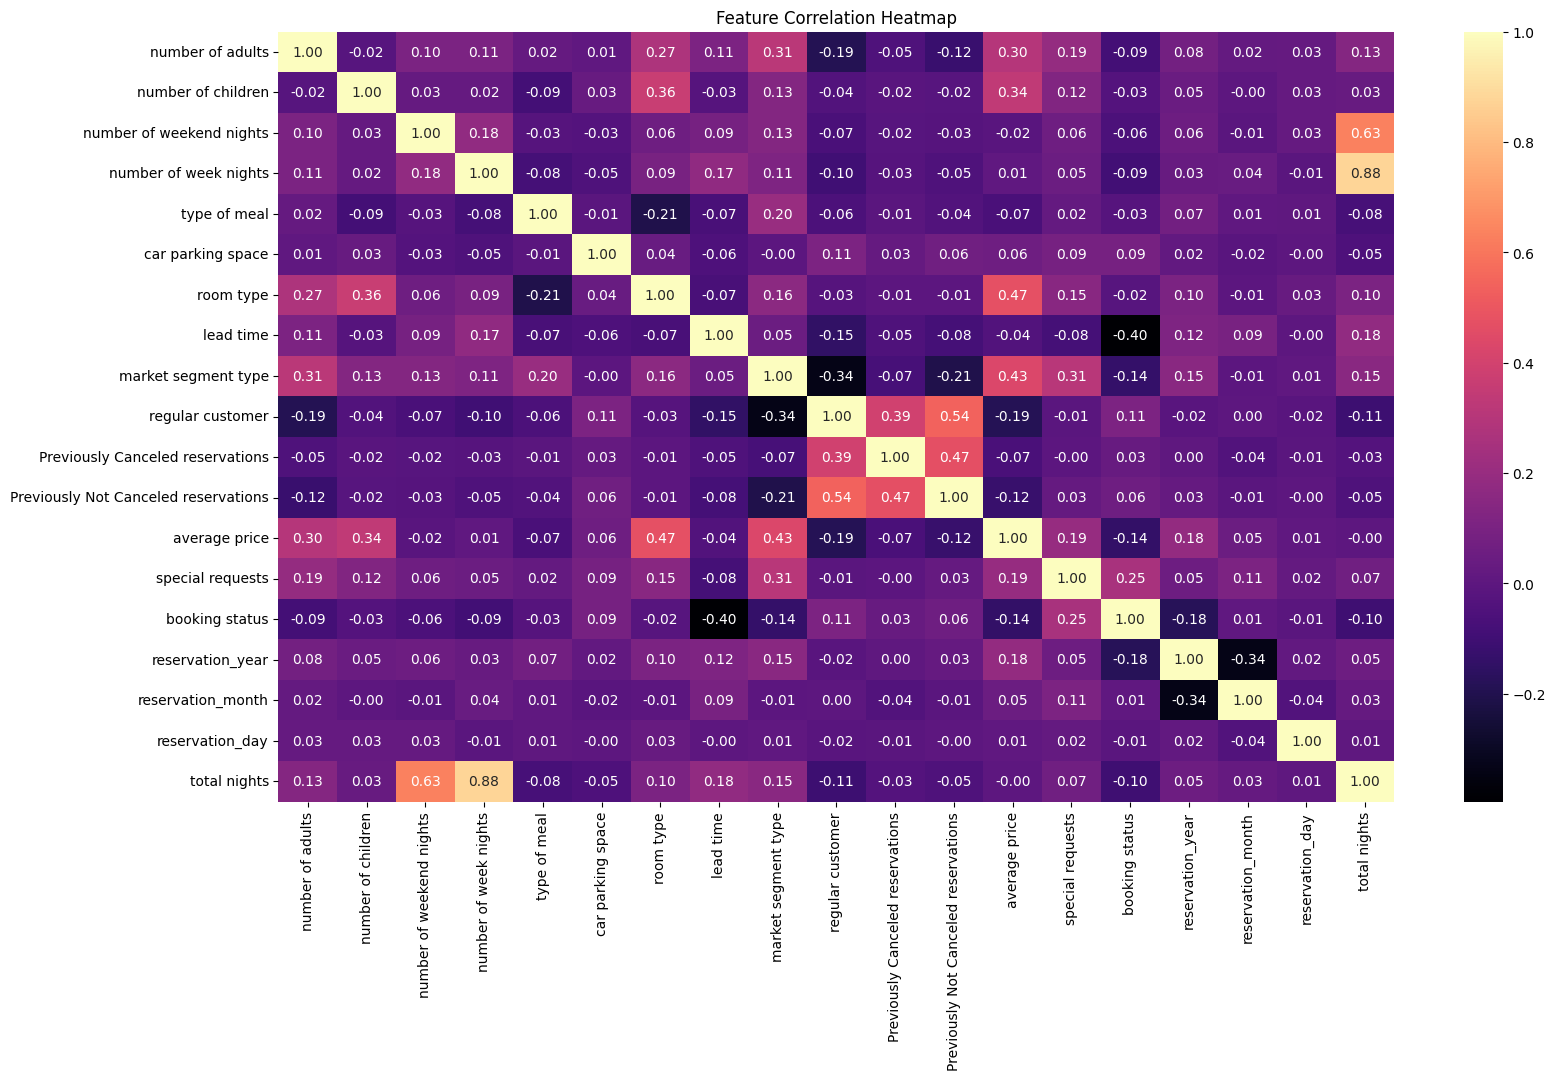

In [184]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

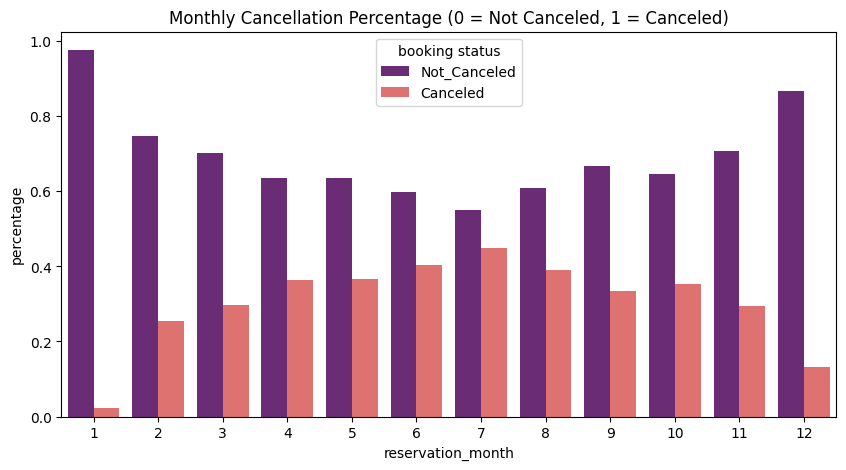

In [185]:
# Plot the cancellation trend
# Create a summary table: percentage of cancellations vs non-cancellations per month
monthly = data.groupby('reservation_month')['booking status'].value_counts(normalize=True).rename('percentage').reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='reservation_month', y='percentage', hue='booking status', data=monthly, palette='magma')
plt.title("Monthly Cancellation Percentage (0 = Not Canceled, 1 = Canceled)")
plt.show()

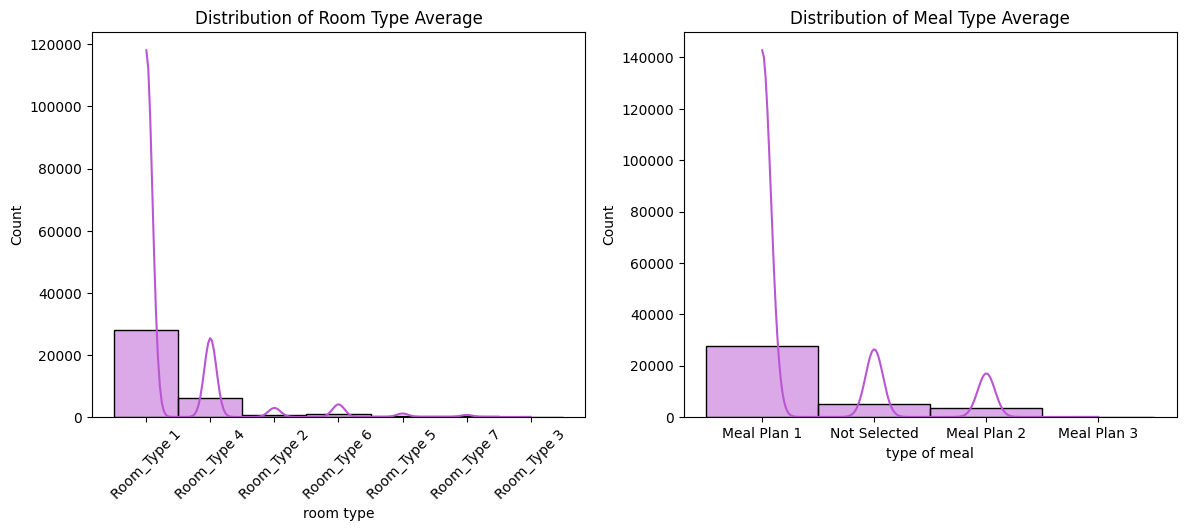

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['room type'], bins=30, ax=axes[0], kde=True, color='mediumorchid')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Distribution of Room Type Average')

sns.histplot(data['type of meal'], bins=30, ax=axes[1], kde=True, color='mediumorchid')
axes[1].set_title('Distribution of Meal Type Average')
plt.show()

#### Distribution of booking status

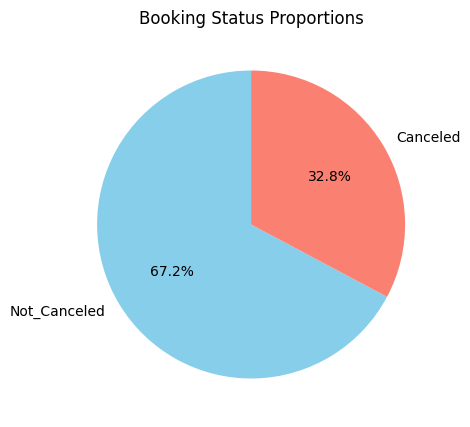

In [187]:
plt.figure(figsize=(8, 5))
data['booking status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Booking Status Proportions')
plt.ylabel('')
plt.show()


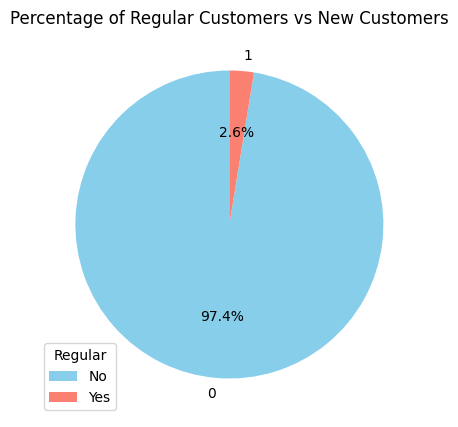

In [188]:
plt.figure(figsize=(8, 5))
data['regular customer'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Percentage of Regular Customers vs New Customers')
plt.ylabel('')
plt.legend(title='Regular', labels=['No', 'Yes'], loc='lower left')
plt.show()

In [189]:
market_segment_mapping = {
    0: "Aviation",
    1: "Complementary",
    2: "Corporate",
    3: "Offline",
    4: "Online"
}

### What is the most common booking channel?

C:\Users\Habiba\AppData\Local\Temp\ipykernel_6120\1479515755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_data["market segment type"], palette='magma')


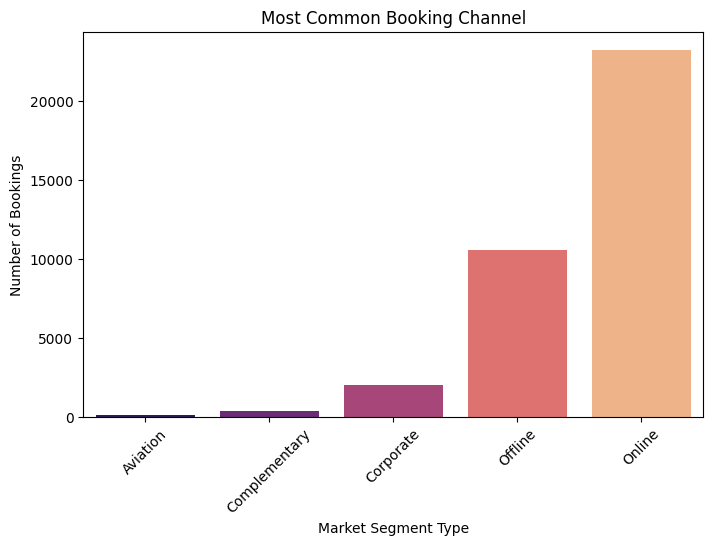

In [190]:
plt.figure(figsize=(8, 5))
sns.countplot(x=cleaned_data["market segment type"], palette='magma')
plt.xlabel("Market Segment Type")
plt.ylabel("Number of Bookings")
plt.title("Most Common Booking Channel")
plt.xticks(ticks=list(market_segment_mapping.keys()), labels=list(market_segment_mapping.values()), rotation=45)
plt.show()

### How does lead time impact booking status?

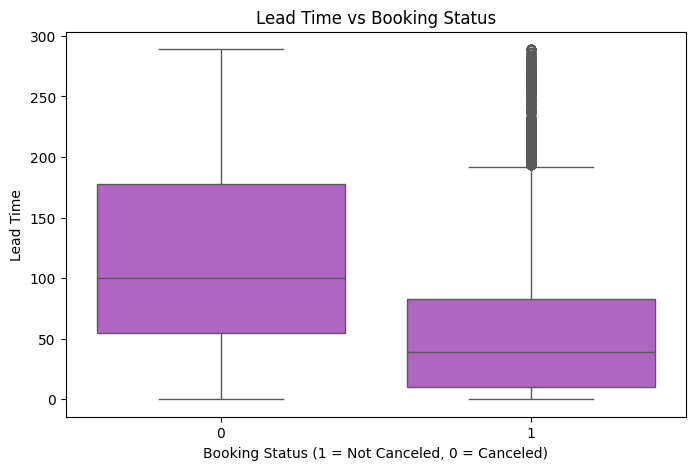

In [191]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_data["booking status"], y=cleaned_data["lead time"], color='mediumorchid')
plt.xlabel("Booking Status (1 = Not Canceled, 0 = Canceled)")
plt.ylabel("Lead Time")
plt.title("Lead Time vs Booking Status")
plt.show()

### What is the trend of hotel bookings over time?

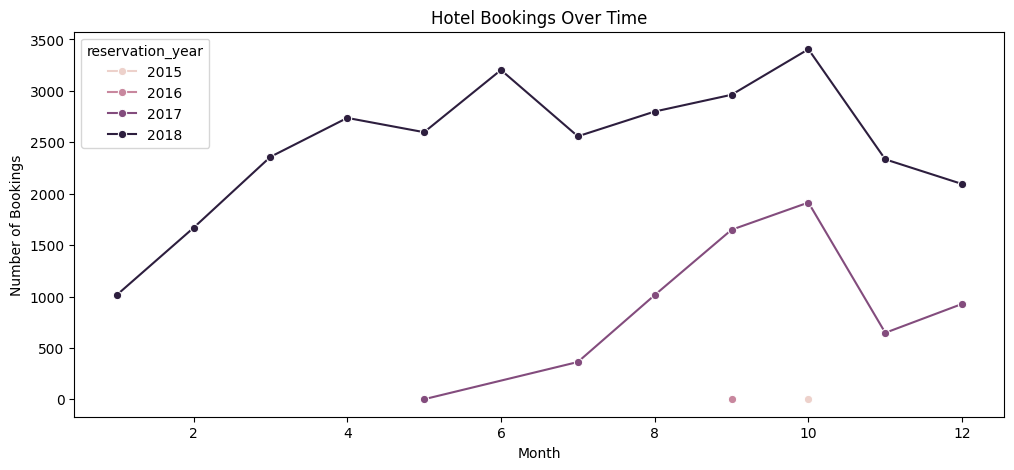

In [192]:
monthly_bookings = cleaned_data.groupby(["reservation_year", "reservation_month"]).size().reset_index(name="bookings")

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_bookings, x="reservation_month", y="bookings", hue="reservation_year", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Hotel Bookings Over Time")
plt.show()

### How do bookings differ on weekends vs. weekdays?

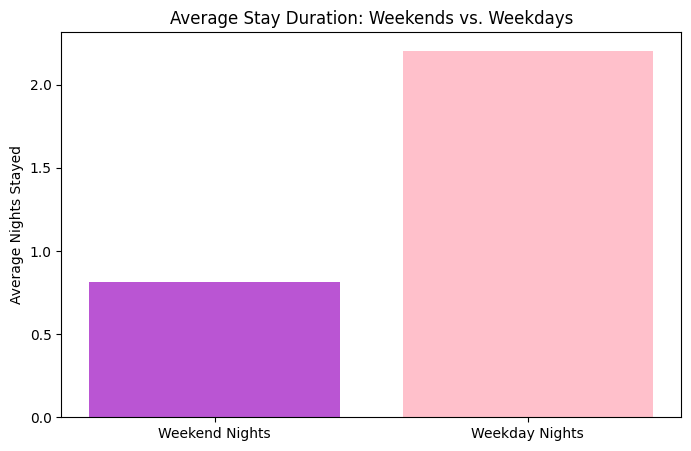

In [193]:
weekend_avg = data['number of weekend nights'].mean()
weekday_avg = data['number of week nights'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Weekend Nights', 'Weekday Nights'], [weekend_avg, weekday_avg], color = ['mediumorchid','pink'])
plt.title('Average Stay Duration: Weekends vs. Weekdays')
plt.ylabel('Average Nights Stayed')
plt.show()


### What is the average price per market segment?

C:\Users\Habiba\AppData\Local\Temp\ipykernel_6120\3965657879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_segment.index, y=avg_price_per_segment.values, palette='magma')


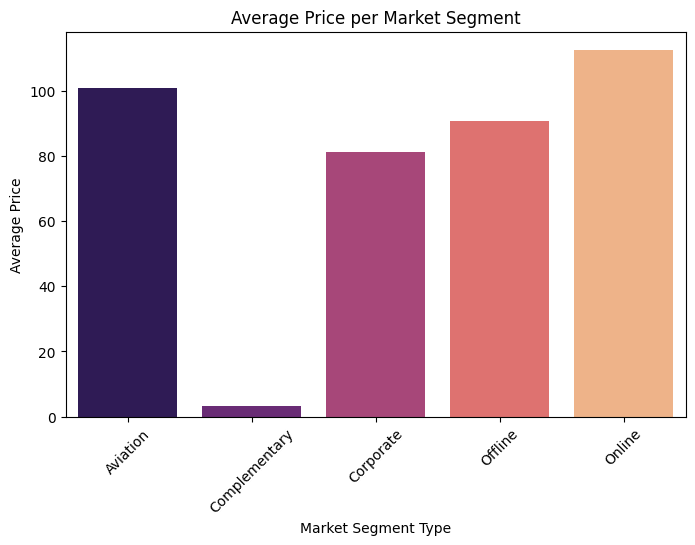

In [194]:
avg_price_per_segment = cleaned_data.groupby("market segment type")["average price"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_per_segment.index, y=avg_price_per_segment.values, palette='magma')
plt.xlabel("Market Segment Type")
plt.ylabel("Average Price")
plt.title("Average Price per Market Segment")
plt.xticks(ticks=list(market_segment_mapping.keys()), labels=list(market_segment_mapping.values()), rotation=45)
plt.show()

#### Cancellation counts for each market segment

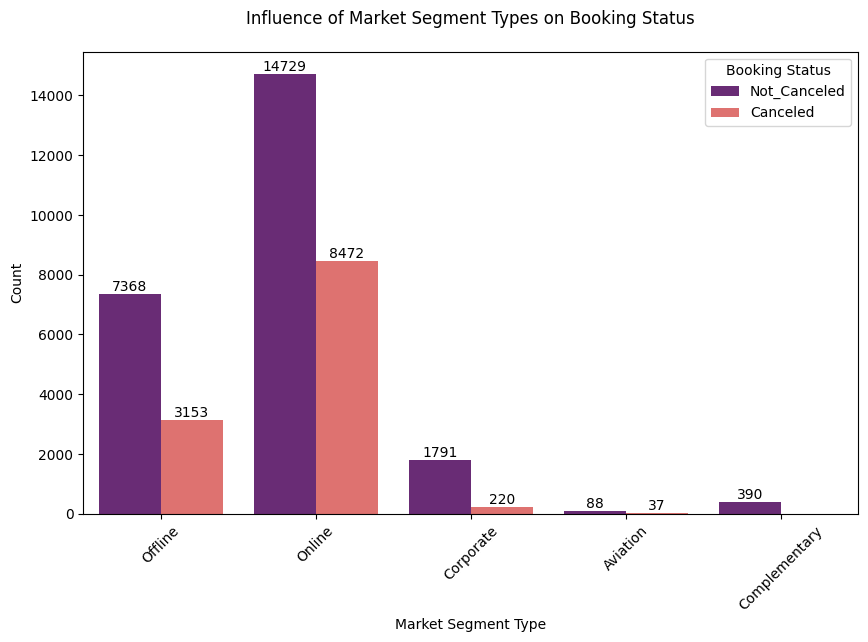

In [195]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='market segment type', data=data, hue='booking status', palette='magma')
plt.title('Influence of Market Segment Types on Booking Status', pad=20)
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


### What is the most common room type booked?

In [196]:
Room_mapping = {
    0: "Room type 1",
    1: "Room type 2",
    2: "Room type 3",
    3: "Room type 4",
    4: "Room type 5",
    5: "Room type 6",
    6: "Room type 7"
}

C:\Users\Habiba\AppData\Local\Temp\ipykernel_6120\3336672019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_data["room type"], palette='magma')


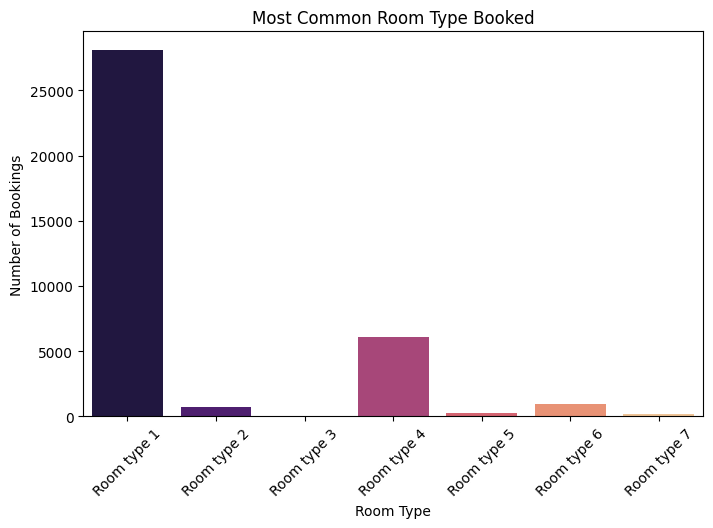

In [197]:
plt.figure(figsize=(8, 5))
sns.countplot(x=cleaned_data["room type"], palette='magma')
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.title("Most Common Room Type Booked")
plt.xticks(ticks=list(Room_mapping.keys()), labels=list(Room_mapping.values()), rotation=45)
plt.show()

### How does meal type preference vary across bookings?

In [198]:
Meal_mapping = {
    0: "Plan 1",
    1: "Plan 2",
    2: "Plan 3",
    3: "Not Selected"
}

C:\Users\Habiba\AppData\Local\Temp\ipykernel_6120\2357455234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_data["type of meal"], palette='magma')


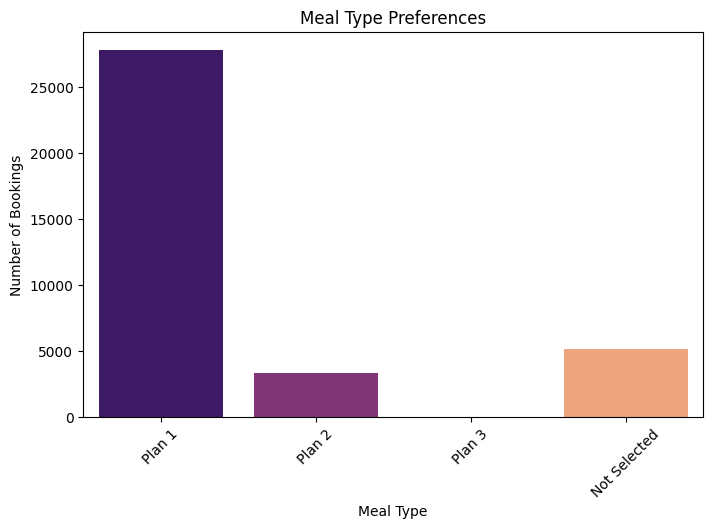

In [199]:
plt.figure(figsize=(8, 5))
sns.countplot(x=cleaned_data["type of meal"], palette='magma')
plt.xlabel("Meal Type")
plt.ylabel("Number of Bookings")
plt.title("Meal Type Preferences")
plt.xticks(ticks=list(Meal_mapping.keys()), labels=list(Meal_mapping.values()), rotation=45)
plt.show()

In [200]:
# Drop weak features (correlation ≈ 0) and features that cause redundancy
features_to_drop = [
    "number of weekend nights", "number of week nights", "number of adults", "number of children",
    "car parking space", "Previously Canceled reservations", "Previously Not Canceled reservations",
    "type of meal", "room type", "reservation_month", "reservation_day"
]

# Drop weak features
cleaned_data = cleaned_data.drop(columns=features_to_drop)

# Verify the remaining columns
cleaned_data.head()

,lead time,market segment type,regular customer,average price,special requests,booking status,reservation_year,total nights
0,224.0,3,0,88.00,0,1,2015,7
1,5.0,4,0,106.68,1,1,2018,4
2,1.0,4,0,50.00,0,0,2018,4
3,211.0,4,0,100.00,1,0,2017,2
4,48.0,4,0,77.00,0,0,2018,3


In [201]:
X = cleaned_data.drop(columns=['booking status'], axis=1)
y = cleaned_data['booking status']

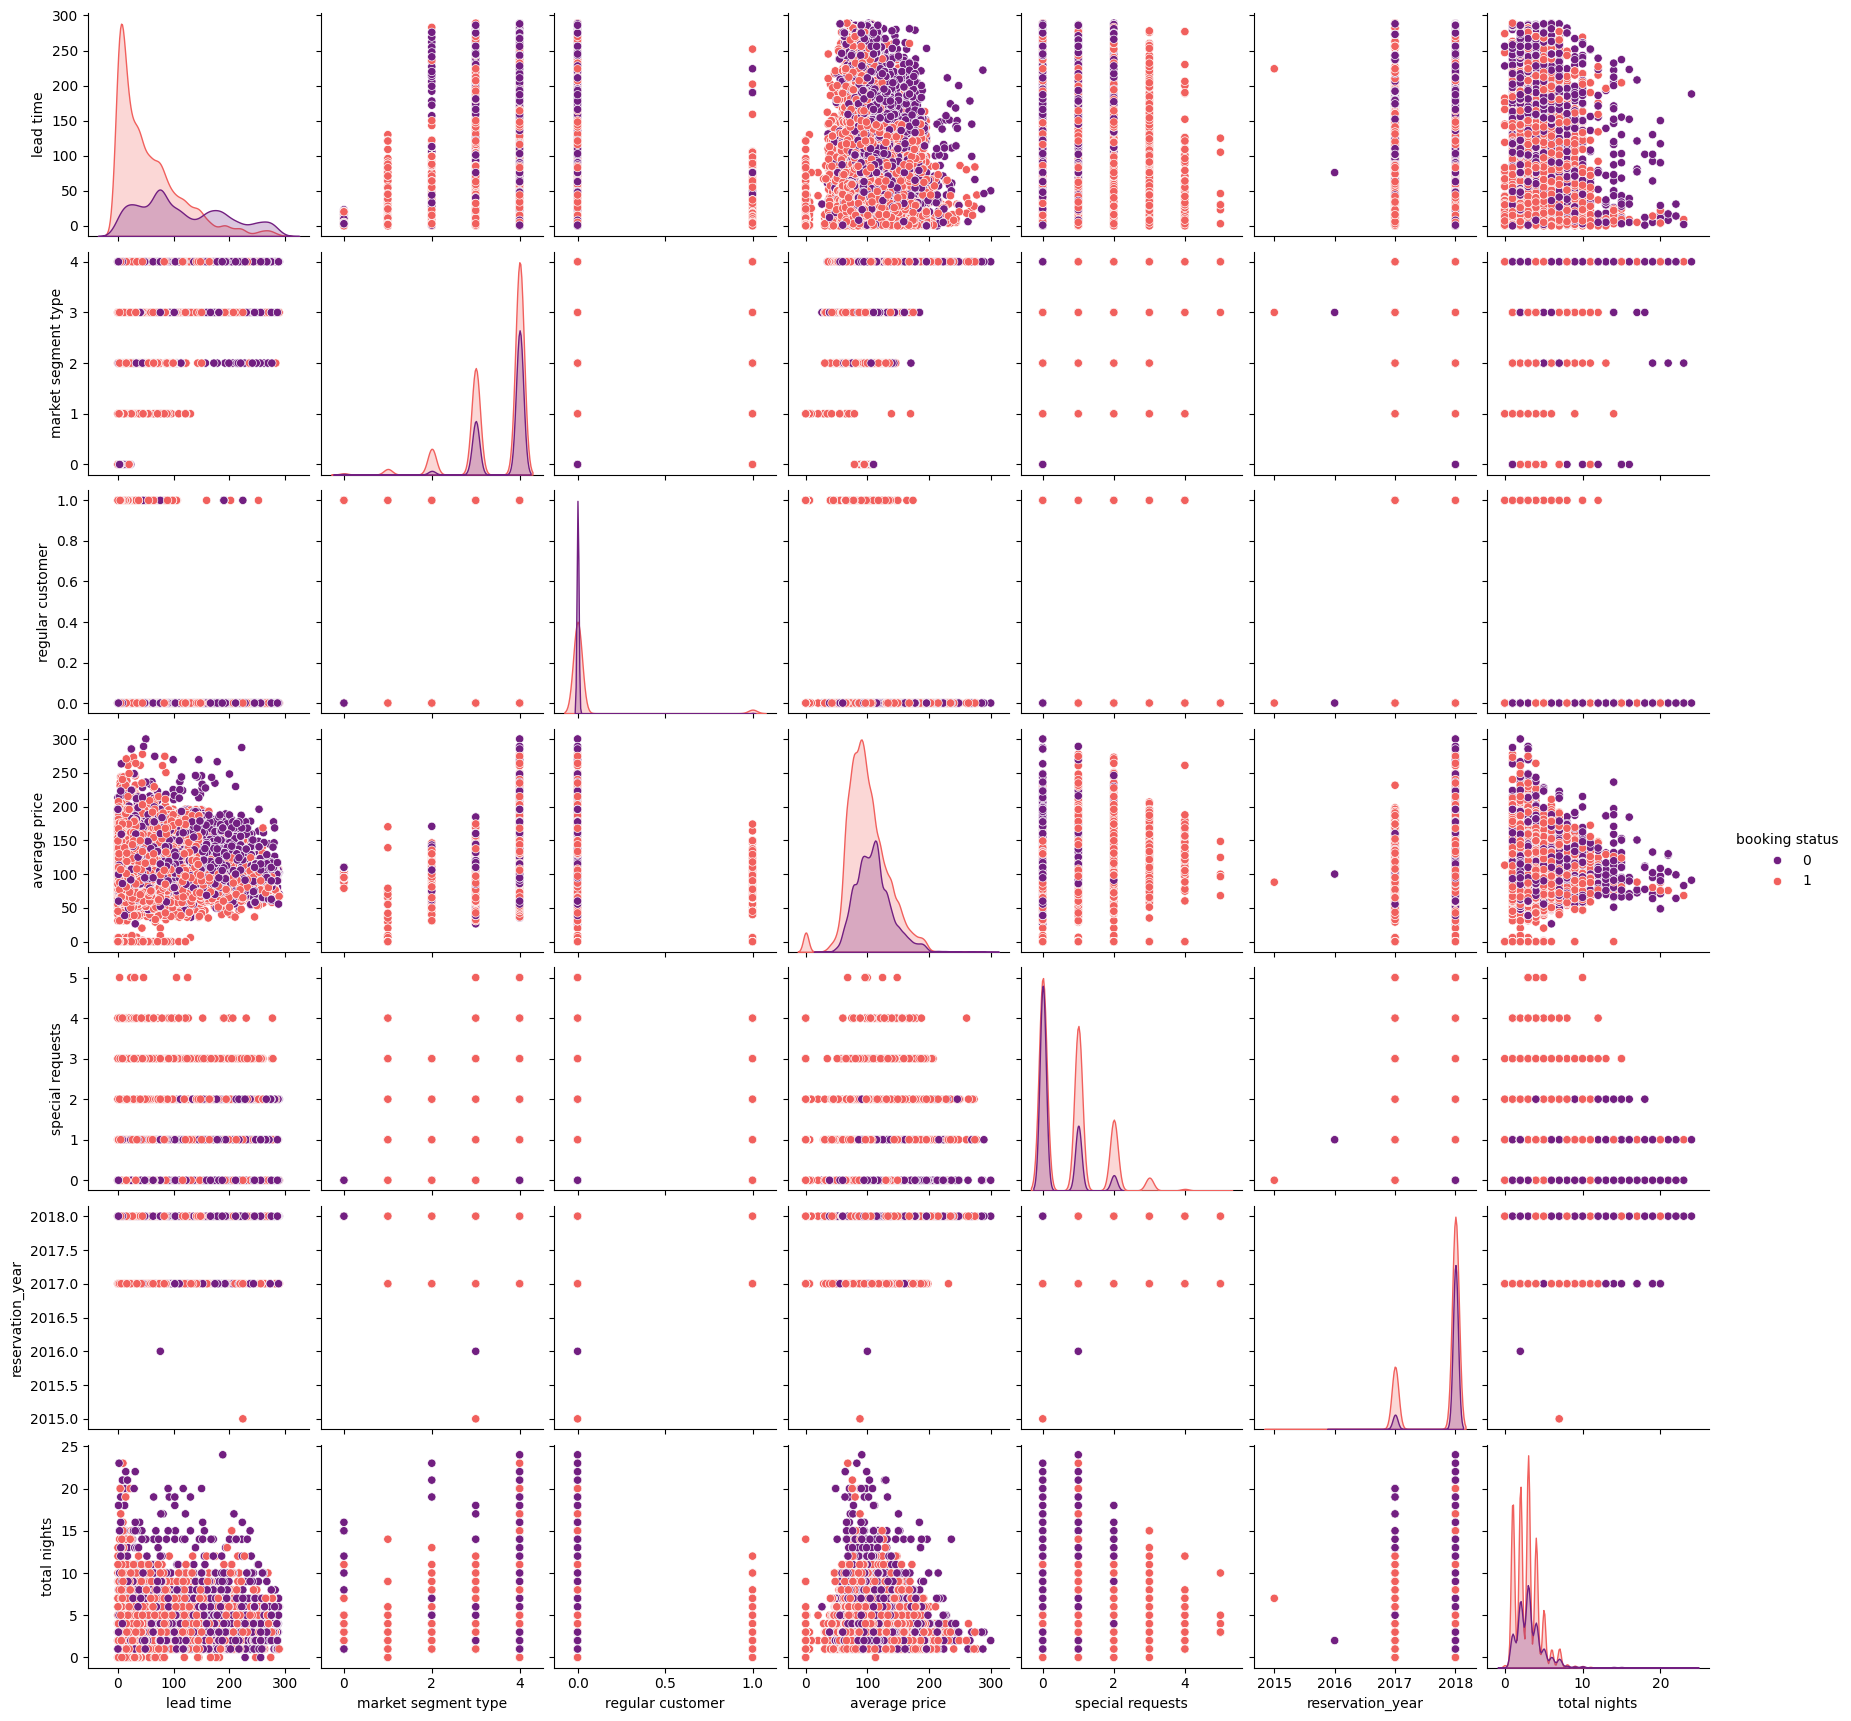

In [202]:
sns.pairplot(cleaned_data, hue='booking status', palette='magma')
plt.show()

In [203]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [204]:
# Check the data distribution in the training set
y_train.value_counts()

booking status
1    19493
0     9505
Name: count, dtype: int64

In [205]:
# Fix the imbalanced data using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Recheck the data balance
y_train.value_counts()

booking status
1    19493
0    19493
Name: count, dtype: int64

In [206]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model

The optimal k value is: 3


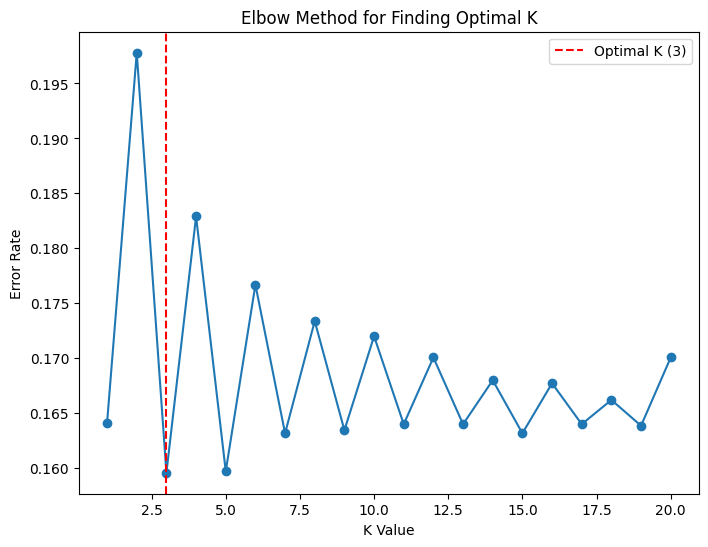

In [207]:
# Find the optimal k value using the elbow method
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Find the optimal k value
optimal_k = k_values[error_rates.index(min(error_rates))]
print(f"The optimal k value is: {optimal_k}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f"Optimal K ({optimal_k})")
plt.legend()
plt.show()

In [214]:
knn = KNeighborsClassifier(n_neighbors=3)

In [215]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [216]:
knn_pred = knn.predict(X_test_scaled)

In [217]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.3f}\n")

knn_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", knn_report)

KNN Accuracy: 0.840

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      2377
           1       0.90      0.86      0.88      4873

    accuracy                           0.84      7250
   macro avg       0.82      0.83      0.82      7250
weighted avg       0.84      0.84      0.84      7250



In [218]:
# Create Confusion Matrix 
cm = confusion_matrix(y_test, knn_pred)

# Create Classification Report 
report_dict = classification_report(y_test, knn_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
metrics_to_plot = ["precision", "recall", "f1-score"]
report_df = report_df[metrics_to_plot]
 
# Predict probabilities for the positive class (1)
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Compute Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


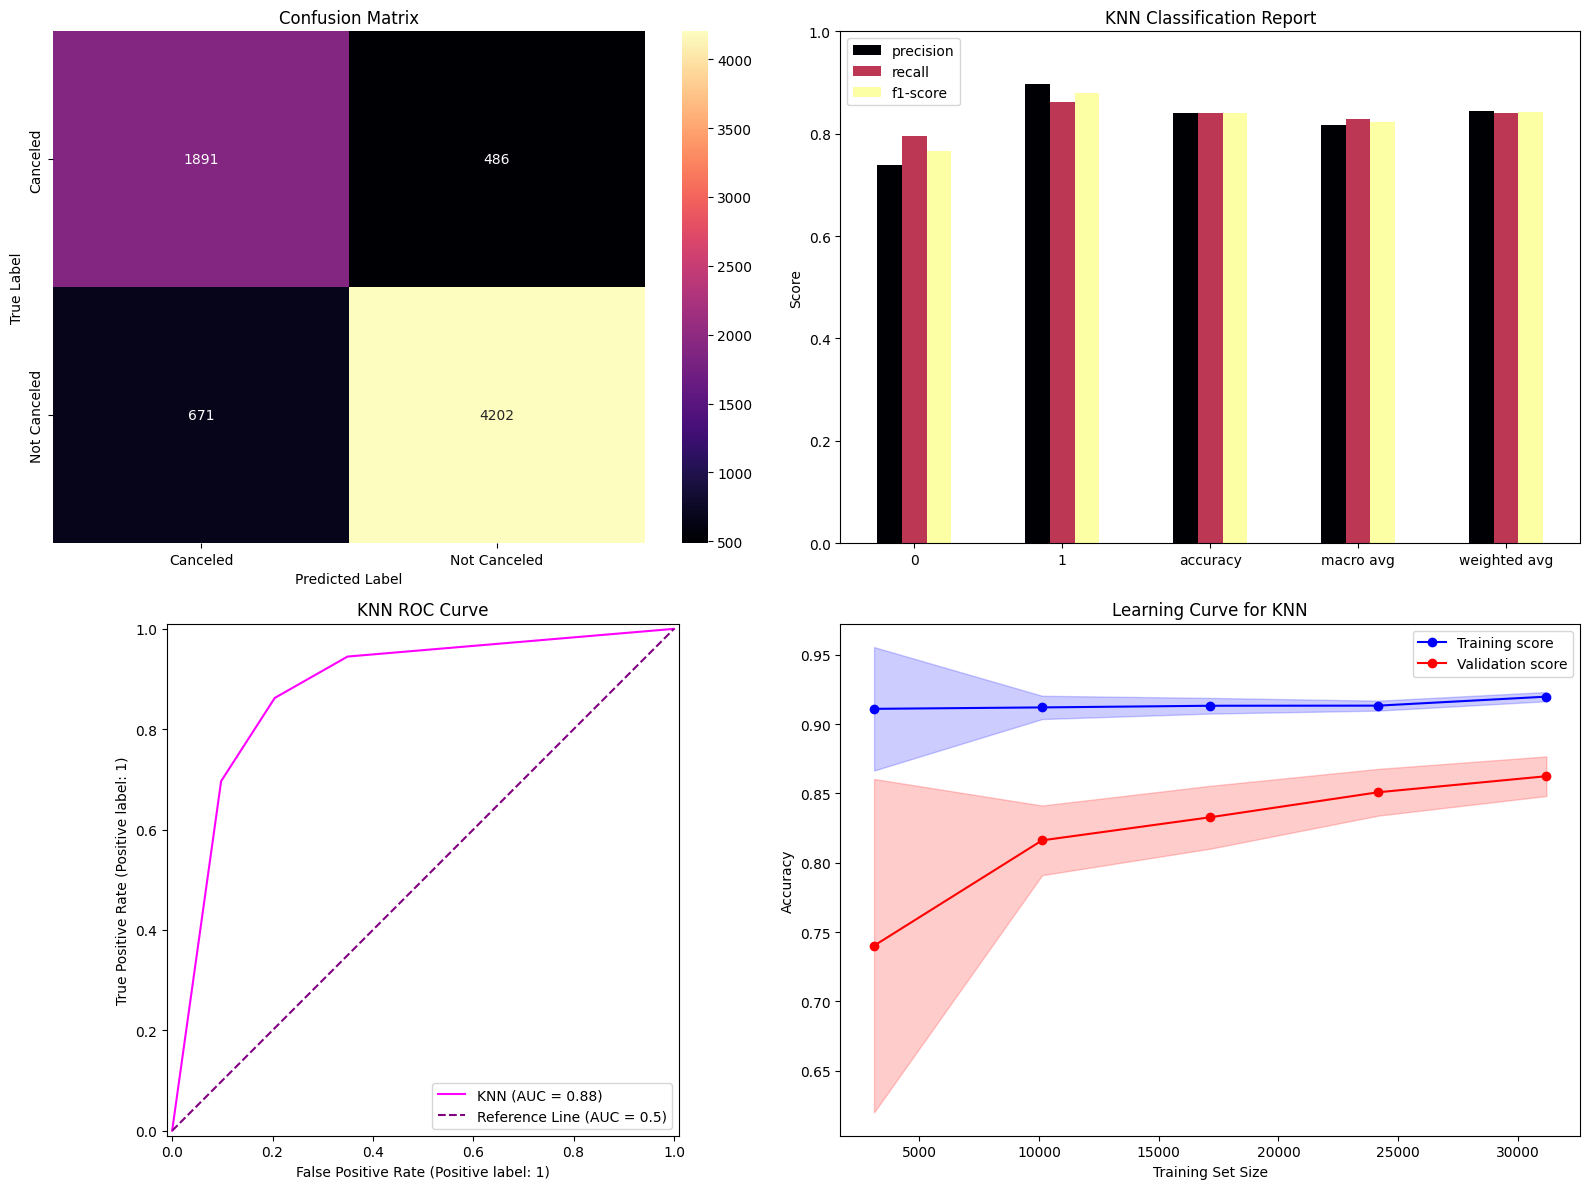

In [219]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=True, ax=axes[0, 0],
            xticklabels=['Canceled', 'Not Canceled'], yticklabels=['Canceled', 'Not Canceled'])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")


report_df.plot(kind='bar', ax=axes[0, 1], colormap='inferno', rot=0)
axes[0, 1].set_title("KNN Classification Report")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_ylabel("Score")


RocCurveDisplay.from_predictions(y_test, knn_probs, ax=axes[1, 0], name='KNN', color='magenta')
axes[1, 0].plot([0, 1], [0, 1], color='purple', linestyle='--', label='Reference Line (AUC = 0.5)')
axes[1, 0].set_title("KNN ROC Curve")
axes[1, 0].legend(loc='lower right')


axes[1, 1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
axes[1, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

axes[1, 1].plot(train_sizes, test_mean, 'o-', color='red', label='Validation score')
axes[1, 1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

axes[1, 1].set_title('Learning Curve for KNN')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

# Logistic Regression Model

In [227]:
logistic = LogisticRegression()

In [228]:
cv_scores = cross_val_score(logistic, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Mean Accuracy: {cv_scores.mean()}')

Mean Accuracy: 0.7675323102384194


In [229]:
logistic.fit(X_train_scaled, y_train)


LogisticRegression()

In [230]:
logistic_pred = logistic.predict(X_test_scaled)

In [231]:
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print(f"Logistic Accuracy: {logistic_accuracy:.3f}\n")
logistic_report = classification_report(y_test, logistic_pred)
print("Classification Report:\n", logistic_report)

Logistic Accuracy: 0.754

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      2377
           1       0.86      0.76      0.81      4873

    accuracy                           0.75      7250
   macro avg       0.73      0.75      0.74      7250
weighted avg       0.77      0.75      0.76      7250



In [232]:
# Confusion Matrix
cm = confusion_matrix(y_test, logistic_pred)

# Classification Report
report_dict = classification_report(y_test, logistic_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
metrics_to_plot = ["precision", "recall", "f1-score"]
report_df = report_df[metrics_to_plot]

# Predict probabilities for the positive class (1)
logistic_probs = logistic.predict_proba(X_test_scaled)[:, 1]

# Compute Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    logistic, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site

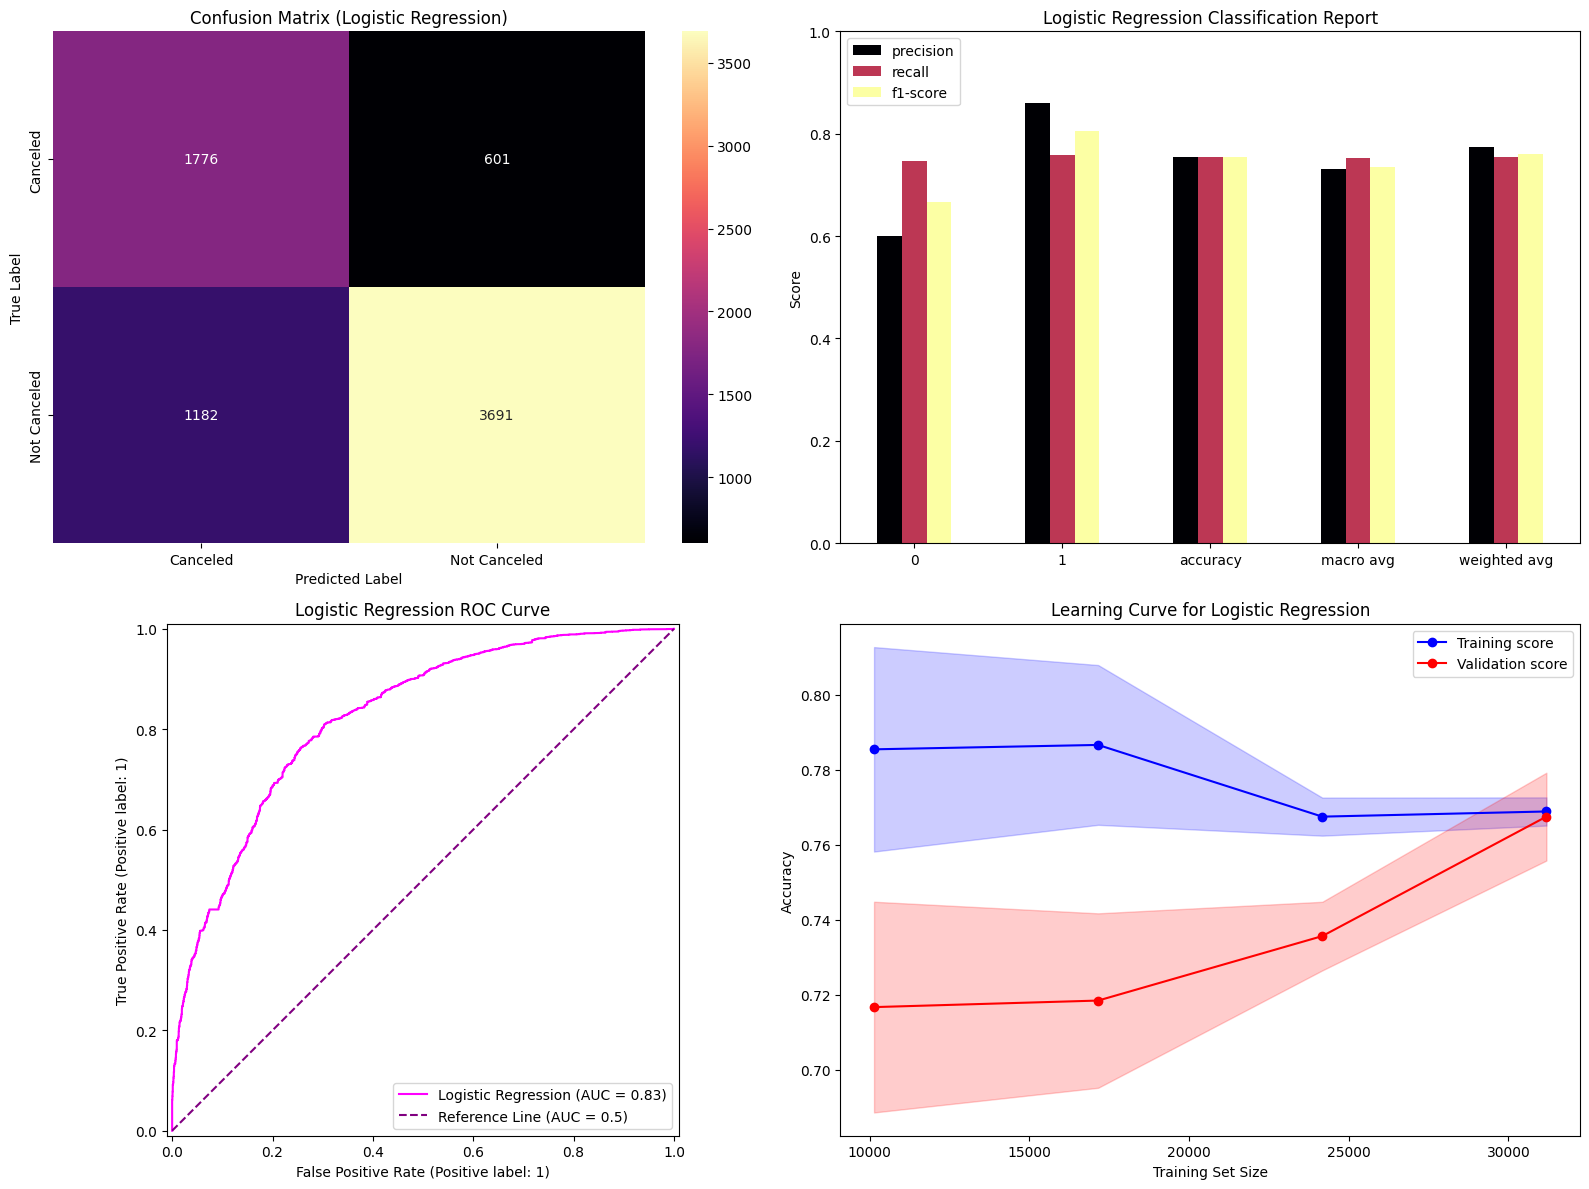

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=True, ax=axes[0, 0],
            xticklabels=['Canceled', 'Not Canceled'], yticklabels=['Canceled', 'Not Canceled'])
axes[0, 0].set_title("Confusion Matrix (Logistic Regression)")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")


report_df.plot(kind='bar', ax=axes[0, 1], colormap='inferno', rot=0)
axes[0, 1].set_title("Logistic Regression Classification Report")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_ylabel("Score")


RocCurveDisplay.from_predictions(y_test, logistic_probs, ax=axes[1, 0], name='Logistic Regression', color='magenta')
axes[1, 0].plot([0, 1], [0, 1], color='purple', linestyle='--', label='Reference Line (AUC = 0.5)')
axes[1, 0].set_title("Logistic Regression ROC Curve")
axes[1, 0].legend(loc='lower right')


axes[1, 1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
axes[1, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

axes[1, 1].plot(train_sizes, test_mean, 'o-', color='red', label='Validation score')
axes[1, 1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

axes[1, 1].set_title('Learning Curve for Logistic Regression')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

# XGBoost Model

In [234]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [235]:
xgb_model.fit(X_train_scaled, y_train)

C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [18:38:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [236]:
xgb_pred = xgb_model.predict(X_test_scaled)

In [237]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGB Accuracy: {xgb_accuracy:.3f}\n")
xgb_report = classification_report(y_test, xgb_pred)
print("Classification Report:\n", xgb_report)

XGB Accuracy: 0.857

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      2377
           1       0.90      0.88      0.89      4873

    accuracy                           0.86      7250
   macro avg       0.84      0.85      0.84      7250
weighted avg       0.86      0.86      0.86      7250



In [238]:
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute Performance Metrics
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_report_dict = classification_report(y_test, xgb_pred, output_dict=True)
xgb_report_df = pd.DataFrame(xgb_report_dict).transpose()[["precision", "recall", "f1-score"]]

# Compute Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\Habiba\AppData\Roaming\Python\Python313\site-packages\xgboost\sklearn

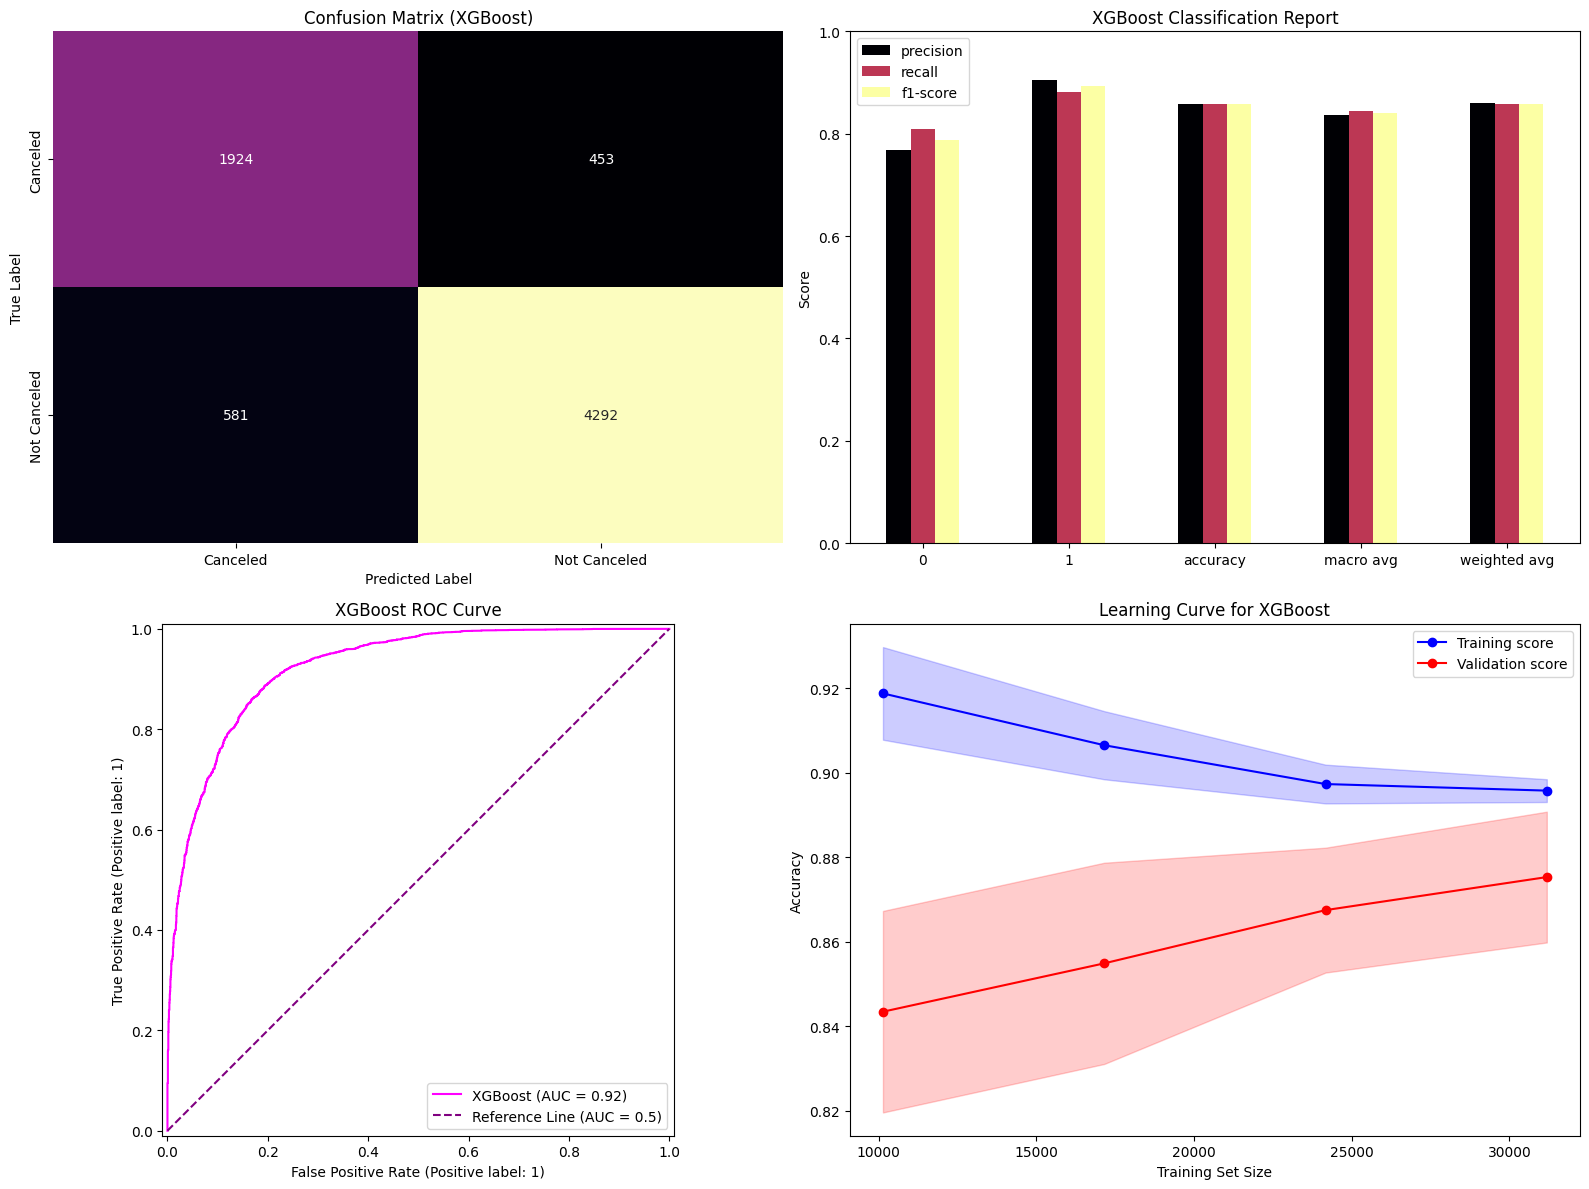

In [239]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='magma', cbar=False, ax=axes[0, 0],
            xticklabels=['Canceled', 'Not Canceled'], yticklabels=['Canceled', 'Not Canceled'])
axes[0, 0].set_title("Confusion Matrix (XGBoost)")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")


xgb_report_df.plot(kind='bar', ax=axes[0, 1], colormap='inferno', rot=0)
axes[0, 1].set_title("XGBoost Classification Report")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_ylabel("Score")


RocCurveDisplay.from_predictions(y_test, xgb_probs, ax=axes[1, 0], name='XGBoost', color='magenta')
axes[1, 0].plot([0, 1], [0, 1], color='purple', linestyle='--', label='Reference Line (AUC = 0.5)')
axes[1, 0].set_title("XGBoost ROC Curve")
axes[1, 0].legend(loc='lower right')


axes[1, 1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
axes[1, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

axes[1, 1].plot(train_sizes, test_mean, 'o-', color='red', label='Validation score')
axes[1, 1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

axes[1, 1].set_title('Learning Curve for XGBoost')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

# Random Forest Model

In [240]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [241]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [242]:
rf_pred = rf_model.predict(X_test_scaled)

In [243]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"RF Accuracy: {rf_accuracy:.3f}\n")
rf_report = classification_report(y_test, rf_pred)
print("Classification Report:\n", rf_report)

RF Accuracy: 0.868

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2377
           1       0.91      0.89      0.90      4873

    accuracy                           0.87      7250
   macro avg       0.85      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250



In [244]:
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute Performance Metrics
rf_cm = confusion_matrix(y_test, rf_pred)
rf_report_dict = classification_report(y_test, rf_pred, output_dict=True)
rf_report_df = pd.DataFrame(rf_report_dict).transpose()[["precision", "recall", "f1-score"]]

# Compute Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

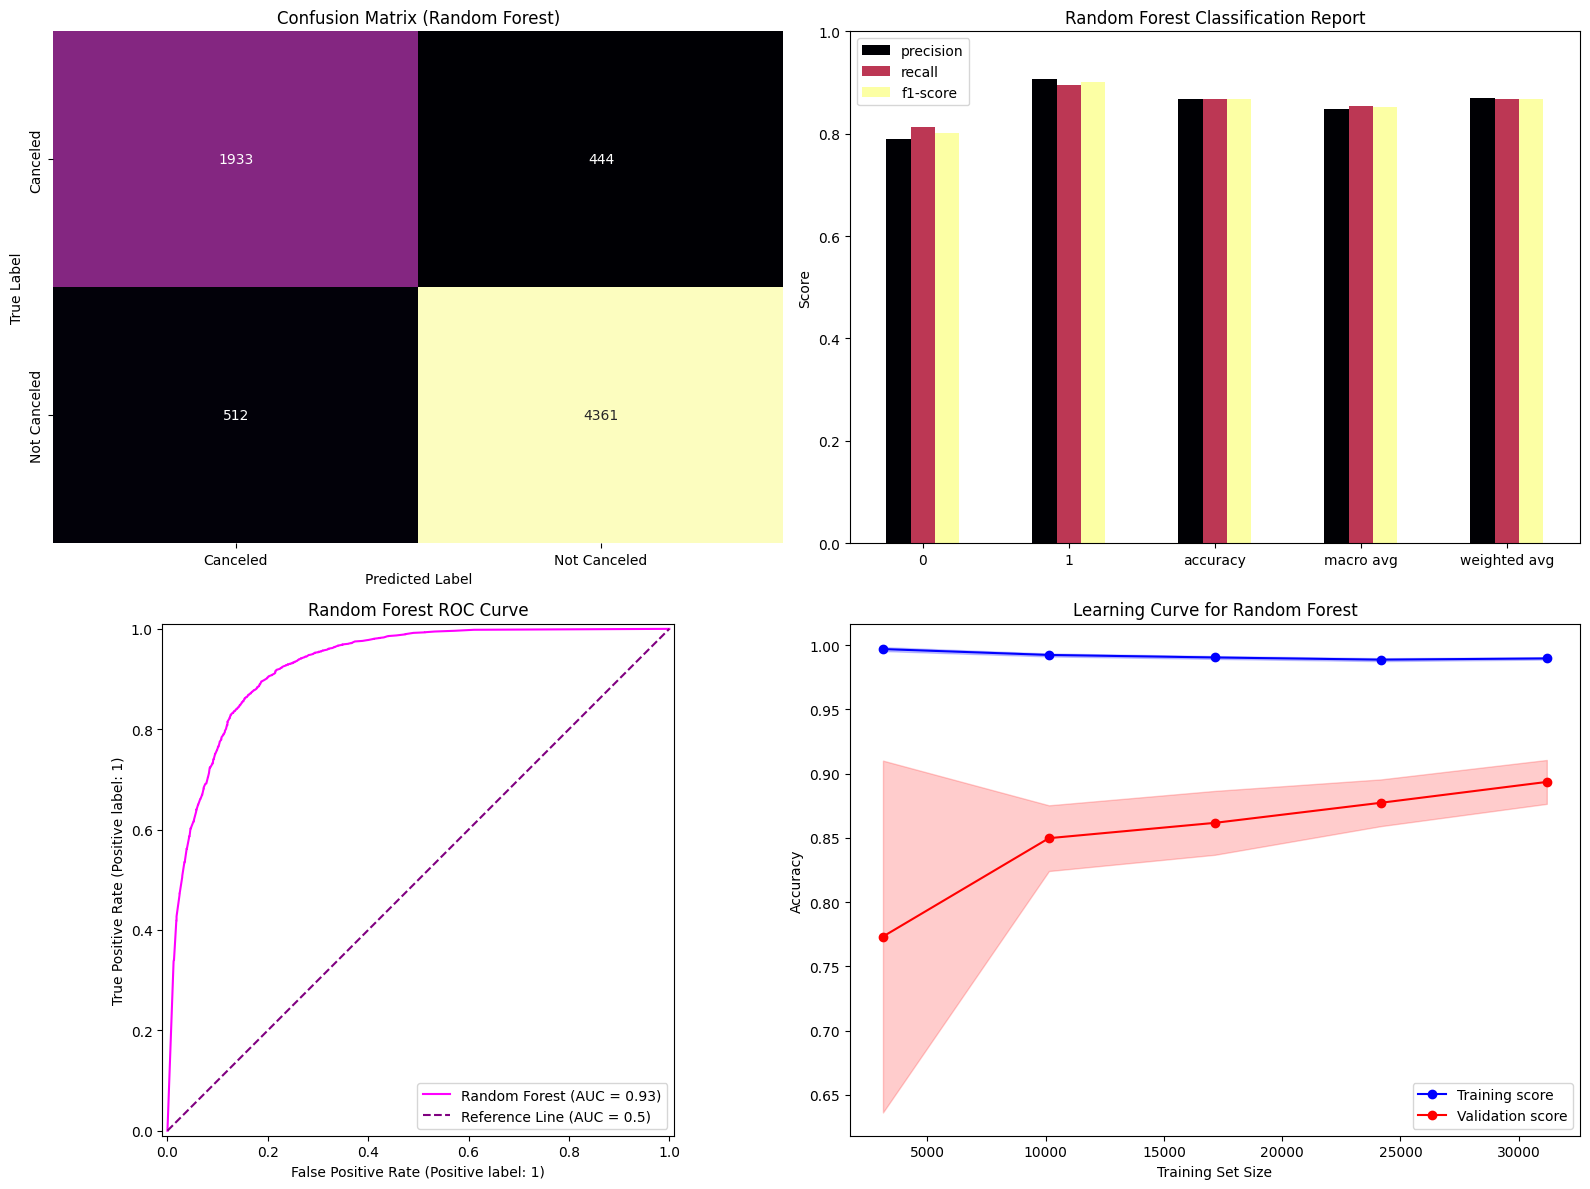

In [245]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='magma', cbar=False, ax=axes[0, 0],
            xticklabels=['Canceled', 'Not Canceled'], yticklabels=['Canceled', 'Not Canceled'])
axes[0, 0].set_title("Confusion Matrix (Random Forest)")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")


rf_report_df.plot(kind='bar', ax=axes[0, 1], colormap='inferno', rot=0)
axes[0, 1].set_title("Random Forest Classification Report")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_ylabel("Score")


RocCurveDisplay.from_predictions(y_test, rf_probs, ax=axes[1, 0], name='Random Forest', color='magenta')
axes[1, 0].plot([0, 1], [0, 1], color='purple', linestyle='--', label='Reference Line (AUC = 0.5)')
axes[1, 0].set_title("Random Forest ROC Curve")
axes[1, 0].legend(loc='lower right')


axes[1, 1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
axes[1, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

axes[1, 1].plot(train_sizes, test_mean, 'o-', color='red', label='Validation score')
axes[1, 1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

axes[1, 1].set_title('Learning Curve for Random Forest')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

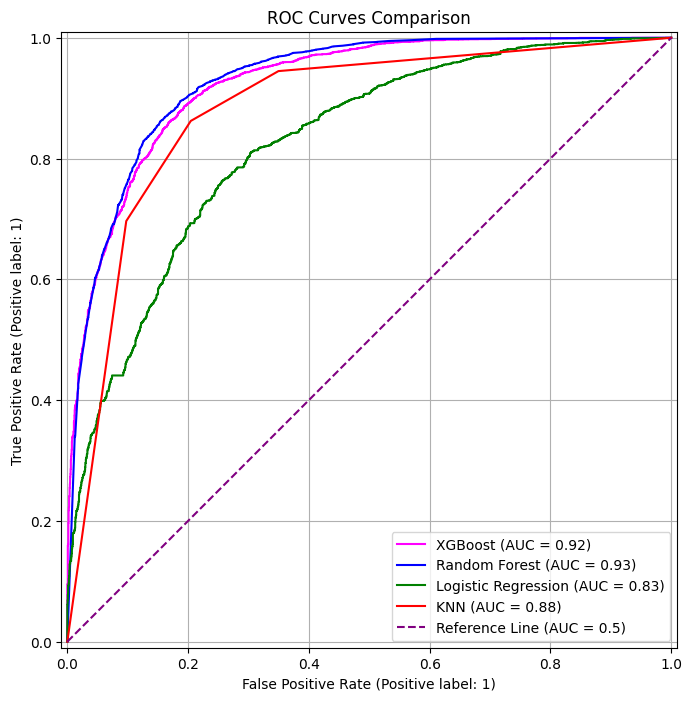

In [246]:
fig, ax = plt.subplots(figsize=(10, 8))


RocCurveDisplay.from_predictions(y_test, xgb_probs, ax=ax, name='XGBoost', color='magenta')
RocCurveDisplay.from_predictions(y_test, rf_probs, ax=ax, name='Random Forest', color='blue')
RocCurveDisplay.from_predictions(y_test, logistic_probs, ax=ax, name='Logistic Regression', color='green')
RocCurveDisplay.from_predictions(y_test, knn_probs, ax=ax, name='KNN', color='red')


ax.plot([0, 1], [0, 1], color='purple', linestyle='--', label='Reference Line (AUC = 0.5)')


ax.set_title('ROC Curves Comparison')
ax.legend(loc='lower right')
ax.grid(True)

# Show the plot
plt.show()

C:\Users\Habiba\AppData\Local\Temp\ipykernel_6120\3450544677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')


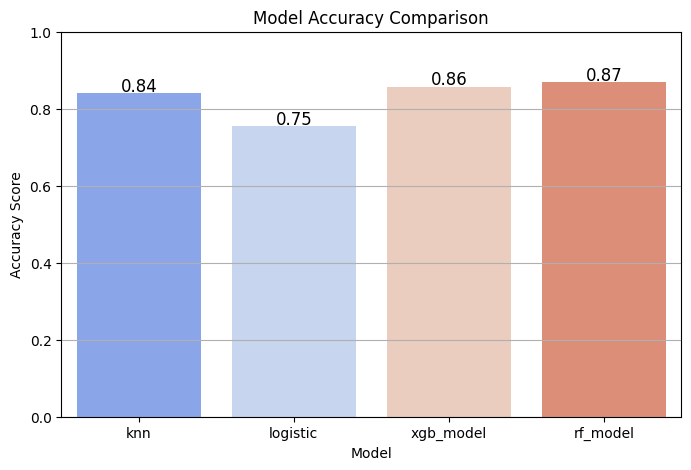

In [247]:
model_names = ['knn', 'logistic', 'xgb_model', 'rf_model']
accuracy_scores = [0.840, 0.754, 0.857, 0.868]


accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})


plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')


for index, value in enumerate(accuracy_scores):
    plt.text(index, value + 0.005, f'{value:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
